In [3]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [4]:
samples_4mu = [

     "4Mu_800GeV_0p25GeV_0p0025mm",   
     "4Mu_800GeV_0p25GeV_0p025mm",
     "4Mu_800GeV_0p25GeV_0p25mm",
     "4Mu_800GeV_0p25GeV_1p2mm",
     "4Mu_800GeV_0p25GeV_2p5mm",
    
     "4Mu_800GeV_1p2GeV_0p012mm",
     "4Mu_800GeV_1p2GeV_0p12mm",
     "4Mu_800GeV_1p2GeV_1p2mm",
     "4Mu_800GeV_1p2GeV_6p0mm",
     "4Mu_800GeV_1p2GeV_12p0mm",
    
     "4Mu_800GeV_5p0GeV_0p05mm",
     "4Mu_800GeV_5p0GeV_0p5mm",
     "4Mu_800GeV_5p0GeV_5p0mm",
     "4Mu_800GeV_5p0GeV_25p0mm",
     "4Mu_800GeV_5p0GeV_50p0mm",
]

In [5]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2", location_cfg="signal_v6.yaml")

events_4mu = {}

for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events()

  0%|          | 0/15 [00:00<?, ?it/s]

root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD_V2/SIDM_BsTo2DpTo4Mu_MBs-800_MDp-0p25_ctau-0p0025/LLPnanoAODv2/SIDM_BsTo2DpTo4Mu_MBs-800_MDp-0p25_ctau-0p0025_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD_V2/SIDM_BsTo2DpTo4Mu_MBs-800_MDp-0p25_ctau-0p025/LLPnanoAODv2/SIDM_BsTo2DpTo4Mu_MBs-800_MDp-0p25_ctau-0p025_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD_V2/SIDM_BsTo2DpTo4Mu_MBs-800_MDp-0p25_ctau-0p25/LLPnanoAODv2/SIDM_BsTo2DpTo4Mu_MBs-800_MDp-0p25_ctau-0p25_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD_V2/SIDM_BsTo2DpTo4Mu_MBs-800_MDp-0p25_ctau-1p2/LLPnanoAODv2/SIDM_BsTo2DpTo4Mu_MBs-800_MDp-0p25_ctau-1p2_part-0.root
root://xcache//store/group/lpcmetx/SIDM/ULSignalSamples/2018_v6/LLPNanoAOD_V2/SIDM_BsTo2DpTo4Mu_MBs-800_MDp-0p25_ctau-2p5/LLPnanoAODv2/SIDM_BsTo2DpTo4Mu_MBs-800_MDp-0p25_ctau-2p5_part-0.root
root://xcache//store/group/lpcmet

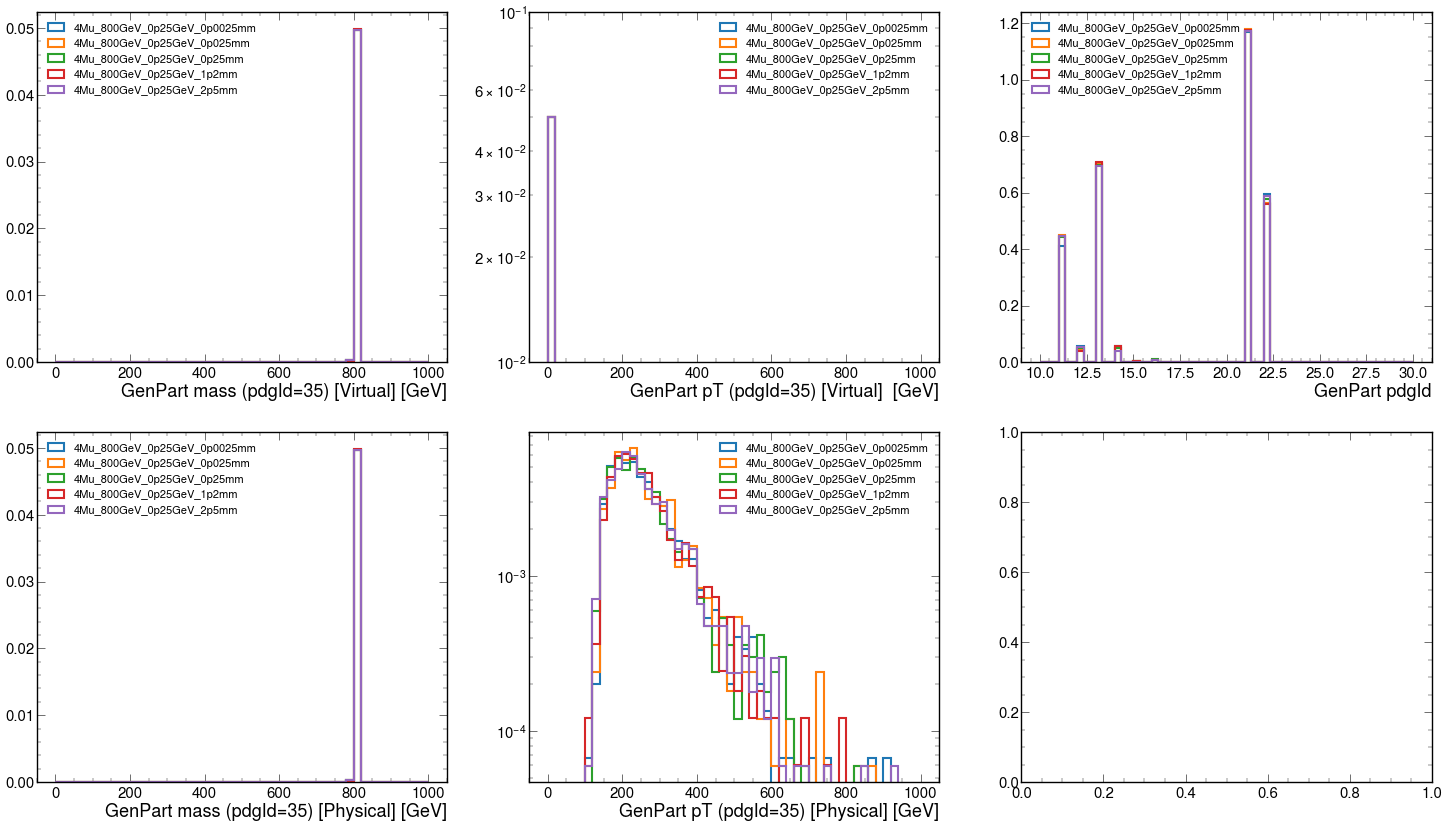

In [12]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))

for i_4mu in samples_4mu[0:5]:
    
    ax[0,0].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,0:1].mass), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,1].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,0:1].pt), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,2].hist(ak.flatten(events_4mu[i_4mu].GenPart.pdgId), range=(10,30), alpha=1, bins=60, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,0].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,1:2].mass), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,1].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,1:2].pt), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)

ax[0,1].set_yscale("log")
ax[1,1].set_yscale("log")
ax[0,0].set_xlabel('GenPart mass (pdgId=35) [Virtual] [GeV]')
ax[0,1].set_xlabel('GenPart pT (pdgId=35) [Virtual]  [GeV]')
ax[1,0].set_xlabel('GenPart mass (pdgId=35) [Physical] [GeV]')
ax[1,1].set_xlabel('GenPart pT (pdgId=35) [Physical] [GeV]')
ax[0,2].set_xlabel('GenPart pdgId')
ax[0,0].legend(fontsize=16)
ax[0,1].legend(fontsize=16)
ax[1,0].legend(fontsize=16)
ax[1,1].legend(fontsize=16)
ax[0,2].legend(fontsize=16, loc='upper left')

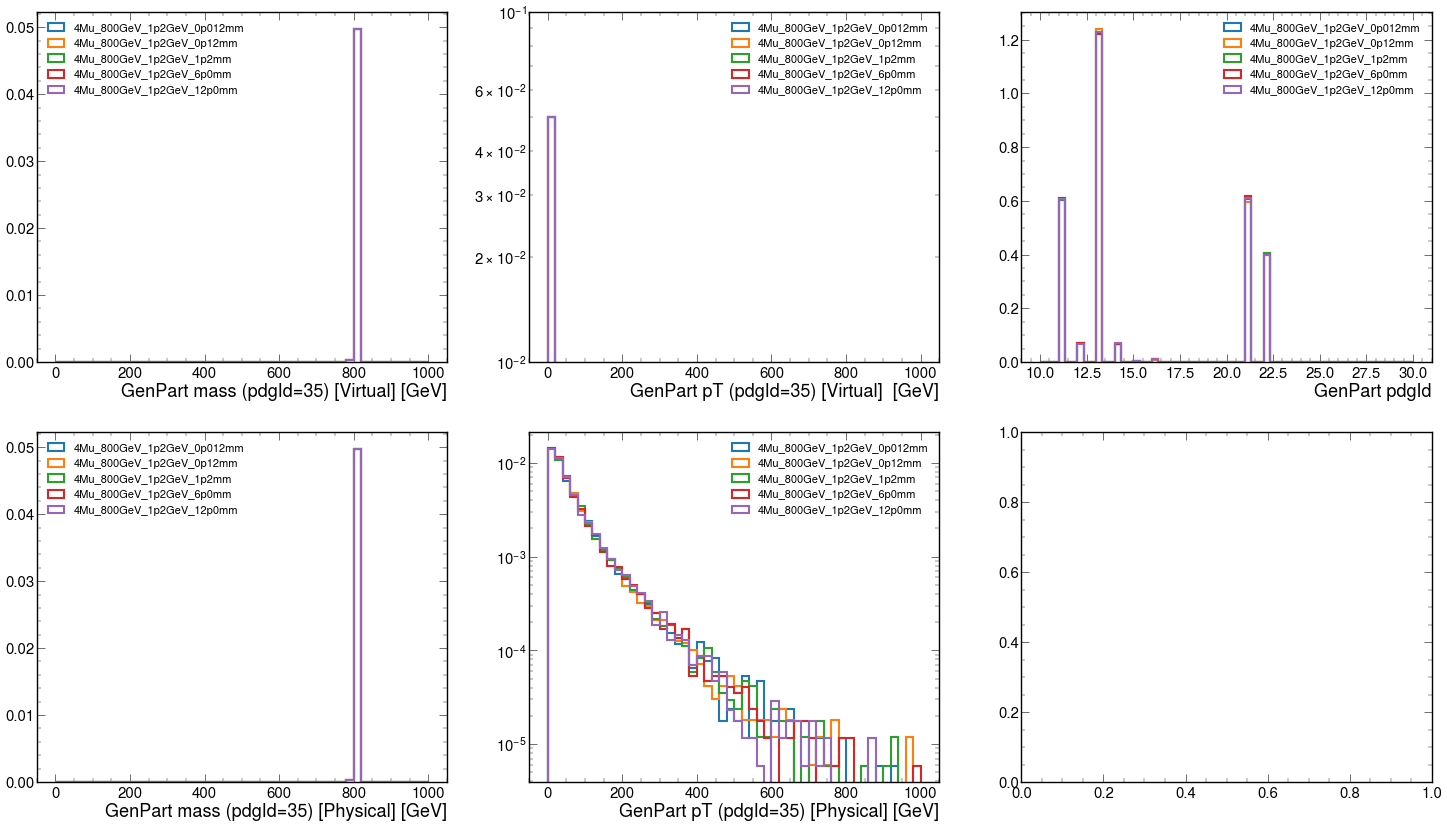

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))

for i_4mu in samples_4mu[5:10]:
    
    ax[0,0].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,0:1].mass), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,1].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,0:1].pt), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,2].hist(ak.flatten(events_4mu[i_4mu].GenPart.pdgId), range=(10,30), alpha=1, bins=60, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,0].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,1:2].mass), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,1].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,1:2].pt), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)

ax[0,1].set_yscale("log")
ax[1,1].set_yscale("log")
ax[0,0].set_xlabel('GenPart mass (pdgId=35) [Virtual] [GeV]')
ax[0,1].set_xlabel('GenPart pT (pdgId=35) [Virtual]  [GeV]')
ax[1,0].set_xlabel('GenPart mass (pdgId=35) [Physical] [GeV]')
ax[1,1].set_xlabel('GenPart pT (pdgId=35) [Physical] [GeV]')
ax[0,2].set_xlabel('GenPart pdgId')
ax[0,0].legend(fontsize=16)
ax[0,1].legend(fontsize=16)
ax[1,0].legend(fontsize=16)
ax[1,1].legend(fontsize=16)
ax[0,2].legend(fontsize=16, loc='upper right')

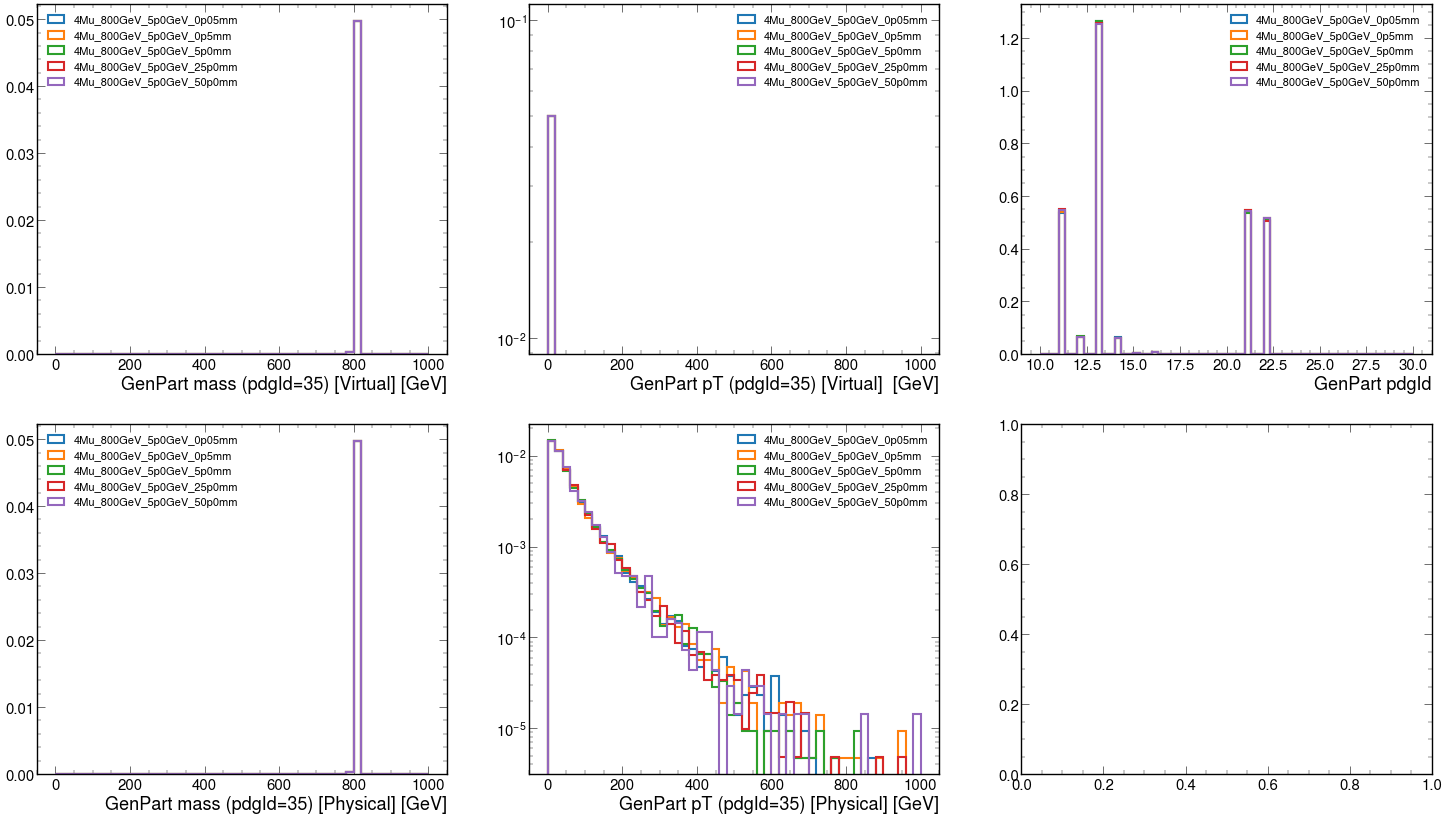

In [14]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))

for i_4mu in samples_4mu[10:15]:
    
    ax[0,0].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,0:1].mass), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,1].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,0:1].pt), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,2].hist(ak.flatten(events_4mu[i_4mu].GenPart.pdgId), range=(10,30), alpha=1, bins=60, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,0].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,1:2].mass), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,1].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,1:2].pt), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)

ax[0,1].set_yscale("log")
ax[1,1].set_yscale("log")
ax[0,0].set_xlabel('GenPart mass (pdgId=35) [Virtual] [GeV]')
ax[0,1].set_xlabel('GenPart pT (pdgId=35) [Virtual]  [GeV]')
ax[1,0].set_xlabel('GenPart mass (pdgId=35) [Physical] [GeV]')
ax[1,1].set_xlabel('GenPart pT (pdgId=35) [Physical] [GeV]')
ax[0,2].set_xlabel('GenPart pdgId')
ax[0,0].legend(fontsize=16)
ax[0,1].legend(fontsize=16)
ax[1,0].legend(fontsize=16)
ax[1,1].legend(fontsize=16)
ax[0,2].legend(fontsize=16, loc='upper right')

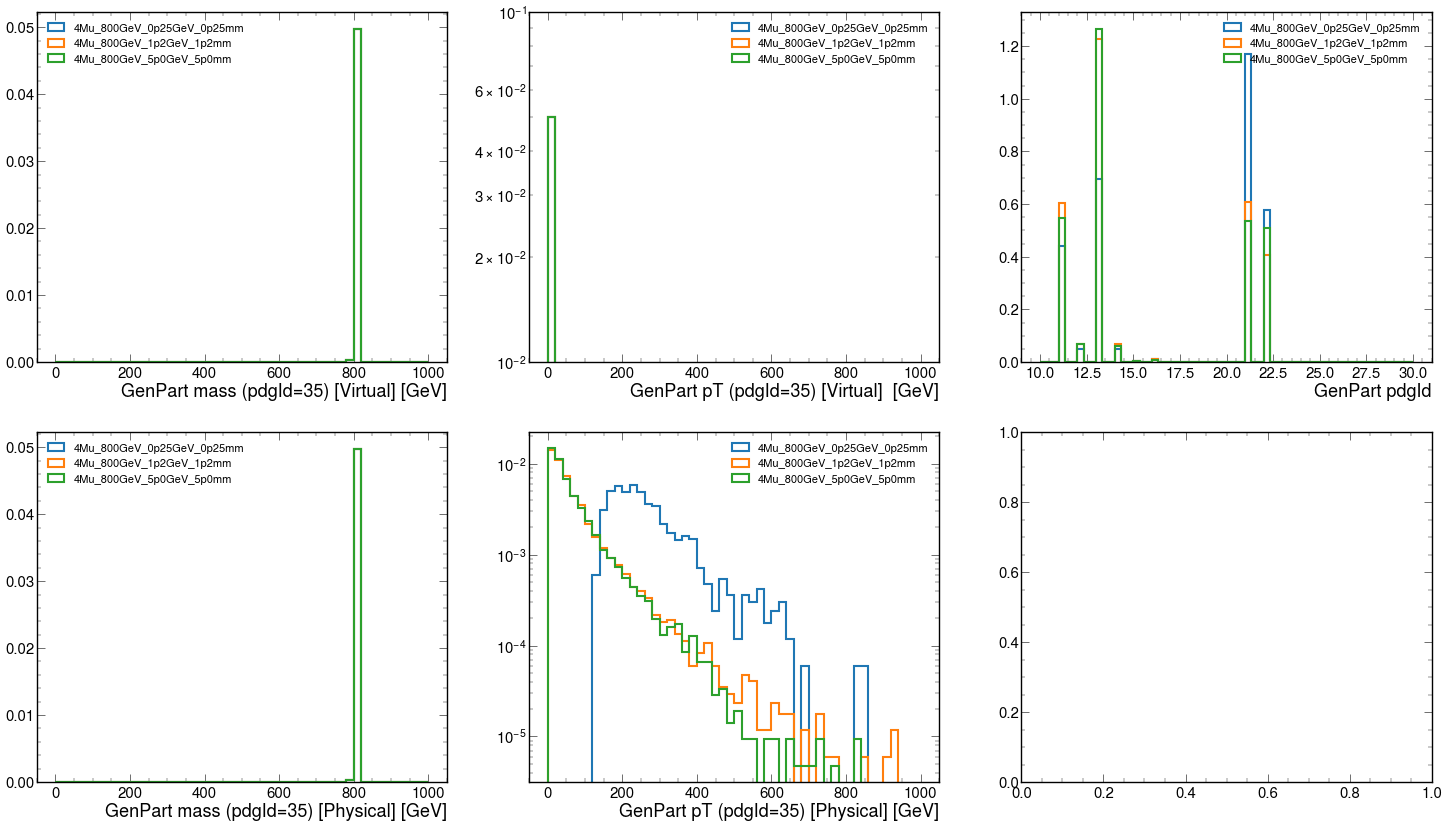

In [15]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))

for i_4mu in ["4Mu_800GeV_0p25GeV_0p25mm","4Mu_800GeV_1p2GeV_1p2mm","4Mu_800GeV_5p0GeV_5p0mm"]:
    
    ax[0,0].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,0:1].mass), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,1].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,0:1].pt), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,2].hist(ak.flatten(events_4mu[i_4mu].GenPart.pdgId), range=(10,30), alpha=1, bins=60, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,0].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,1:2].mass), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,1].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,1:2].pt), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)

ax[0,1].set_yscale("log")
ax[1,1].set_yscale("log")
ax[0,0].set_xlabel('GenPart mass (pdgId=35) [Virtual] [GeV]')
ax[0,1].set_xlabel('GenPart pT (pdgId=35) [Virtual]  [GeV]')
ax[1,0].set_xlabel('GenPart mass (pdgId=35) [Physical] [GeV]')
ax[1,1].set_xlabel('GenPart pT (pdgId=35) [Physical] [GeV]')
ax[0,2].set_xlabel('GenPart pdgId')
ax[0,0].legend(fontsize=16)
ax[0,1].legend(fontsize=16)
ax[1,0].legend(fontsize=16)
ax[1,1].legend(fontsize=16)
ax[0,2].legend(fontsize=16, loc='upper right')

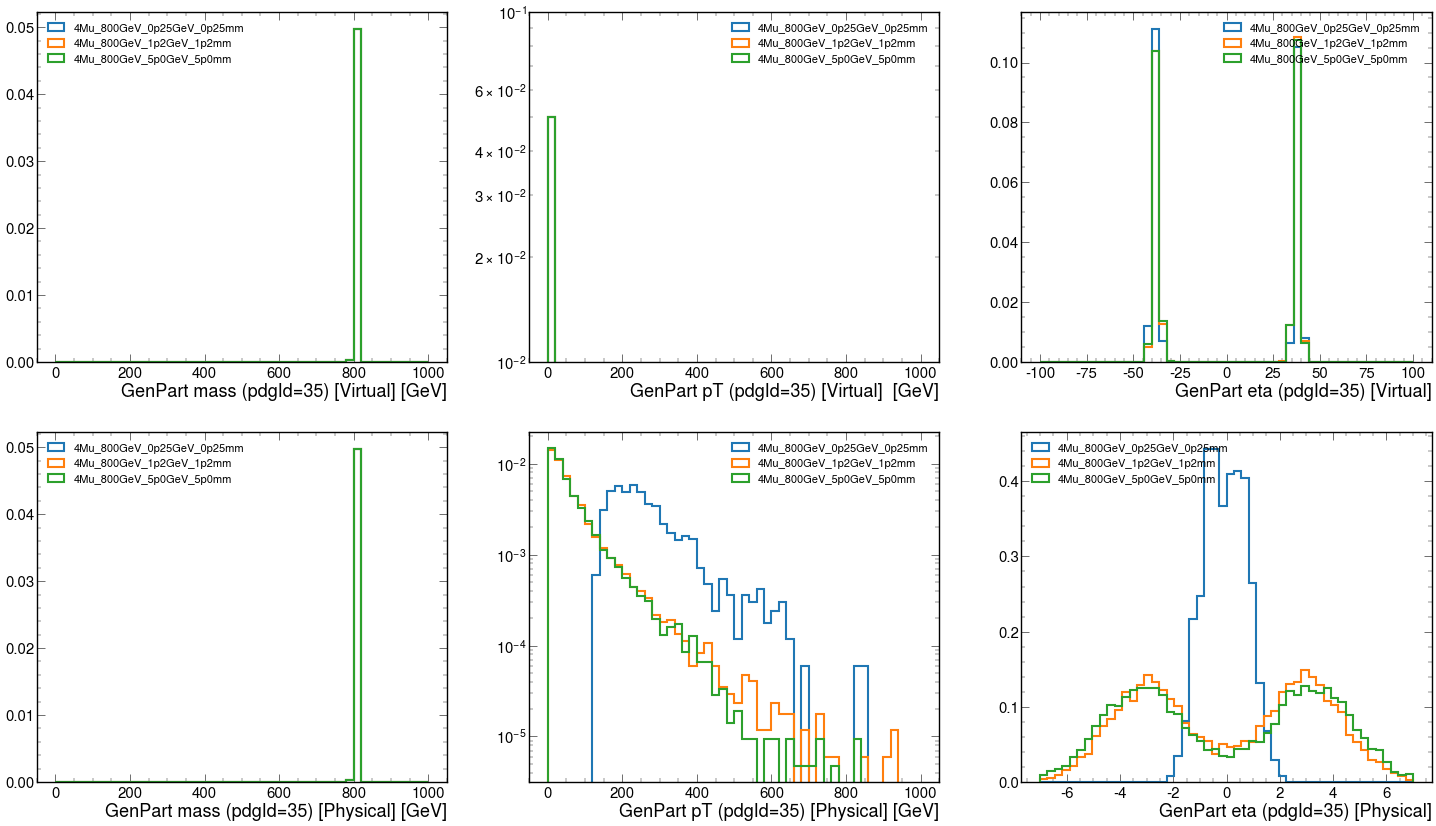

In [22]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 3, figsize=(36,20))

for i_4mu in ["4Mu_800GeV_0p25GeV_0p25mm","4Mu_800GeV_1p2GeV_1p2mm","4Mu_800GeV_5p0GeV_5p0mm"]:
    
    ax[0,0].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,0:1].mass), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,1].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,0:1].pt), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,2].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,0:1].eta), range=(-100,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,0].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,1:2].mass), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,1].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,1:2].pt), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,2].hist(ak.flatten(events_4mu[i_4mu].GenPart[events_4mu[i_4mu].GenPart.pdgId == 35][:,1:2].eta), range=(-7,7), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)

ax[0,1].set_yscale("log")
ax[1,1].set_yscale("log")
ax[0,0].set_xlabel('GenPart mass (pdgId=35) [Virtual] [GeV]')
ax[0,1].set_xlabel('GenPart pT (pdgId=35) [Virtual]  [GeV]')
ax[0,2].set_xlabel('GenPart eta (pdgId=35) [Virtual]')
ax[1,0].set_xlabel('GenPart mass (pdgId=35) [Physical] [GeV]')
ax[1,1].set_xlabel('GenPart pT (pdgId=35) [Physical] [GeV]')
ax[1,2].set_xlabel('GenPart eta (pdgId=35) [Physical]')

ax[0,0].legend(fontsize=16)
ax[0,1].legend(fontsize=16)
ax[0,2].legend(fontsize=16, loc='upper right')
ax[1,0].legend(fontsize=16)
ax[1,1].legend(fontsize=16)
ax[1,2].legend(fontsize=16, loc='upper left')

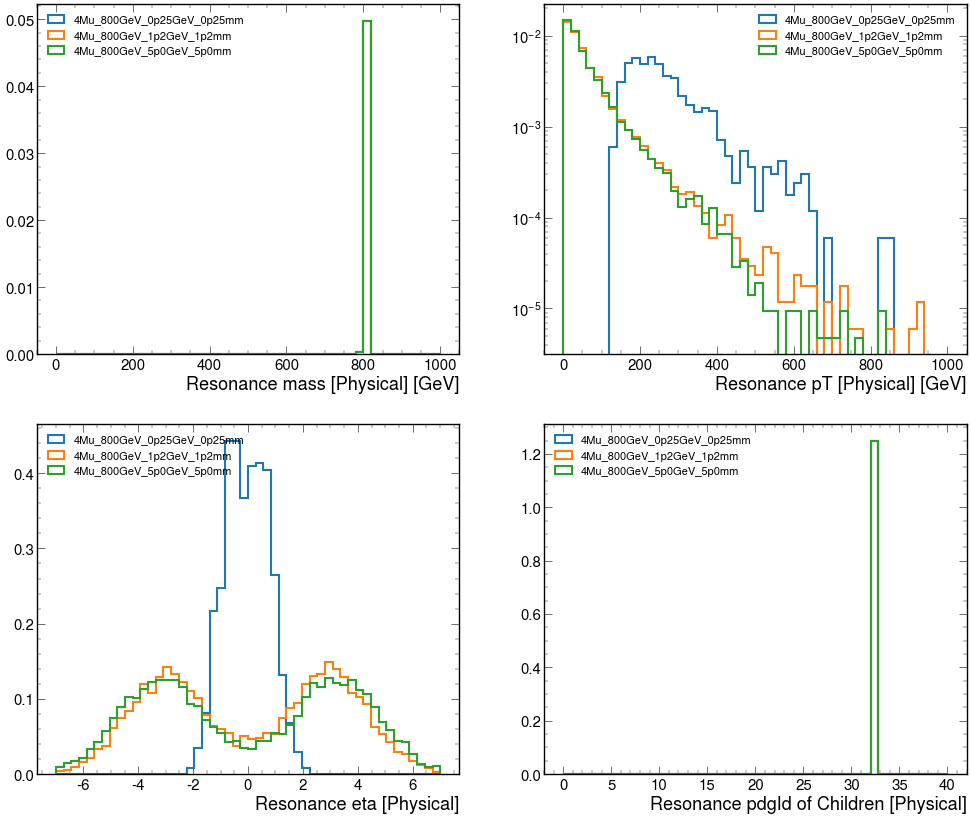

In [28]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 2, figsize=(24,20))

for i_4mu in ["4Mu_800GeV_0p25GeV_0p25mm","4Mu_800GeV_1p2GeV_1p2mm","4Mu_800GeV_5p0GeV_5p0mm"]:
    
    gen_parts = events_4mu[i_4mu].GenPart
    res_sel = (gen_parts.pdgId == 35) & (ak.num(gen_parts.distinctChildrenIdxG,axis=-1) == 2)
    dp_sel = (gen_parts.pdgId == 32)
    res = gen_parts[res_sel]
    
    ax[0,0].hist(ak.flatten(res.mass), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,1].hist(ak.flatten(res.pt), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,0].hist(ak.flatten(res.eta), range=(-7,7), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,1].hist(ak.flatten(gen_parts.pdgId)[ak.flatten(ak.flatten(res.distinctChildrenIdxG))], range=(0,40), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)

ax[0,1].set_yscale("log")

ax[0,0].set_xlabel('Resonance mass [Physical] [GeV]')
ax[0,1].set_xlabel('Resonance pT [Physical] [GeV]')
ax[1,0].set_xlabel('Resonance eta [Physical]')
ax[1,1].set_xlabel('Resonance pdgId of Children [Physical]')

ax[0,0].legend(fontsize=16)
ax[0,1].legend(fontsize=16)
ax[1,0].legend(fontsize=16, loc='upper left')
ax[1,1].legend(fontsize=16)

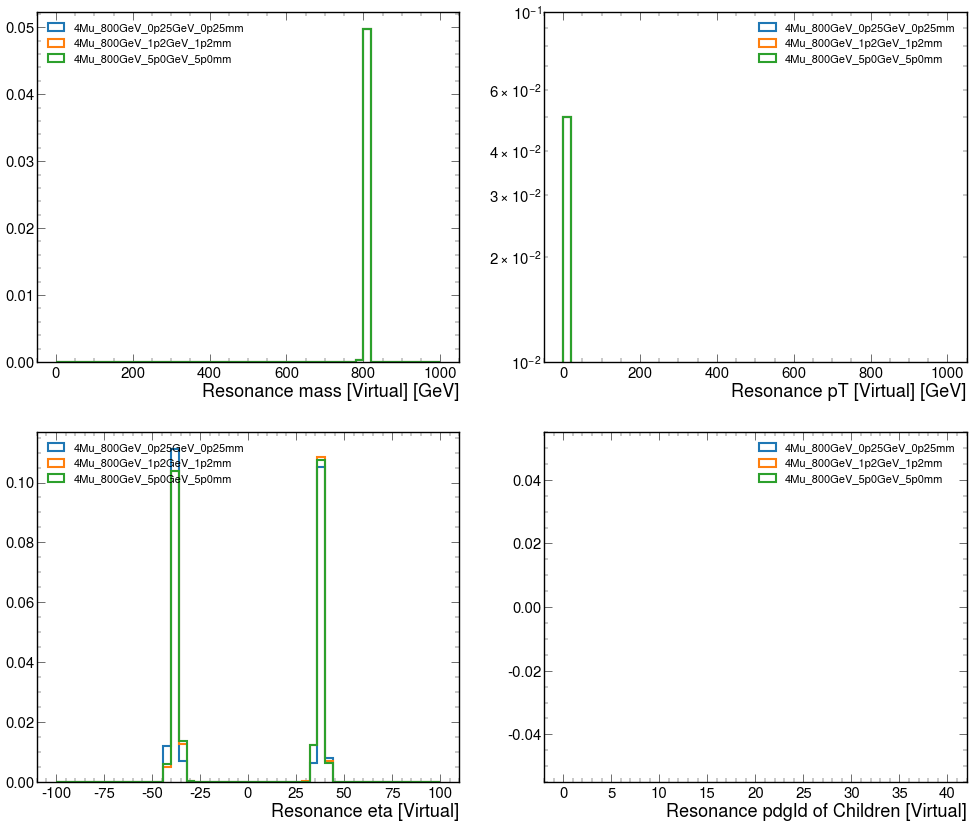

In [30]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 2, figsize=(24,20))

for i_4mu in ["4Mu_800GeV_0p25GeV_0p25mm","4Mu_800GeV_1p2GeV_1p2mm","4Mu_800GeV_5p0GeV_5p0mm"]:
    
    gen_parts = events_4mu[i_4mu].GenPart
    res_sel = (gen_parts.pdgId == 35) & (ak.num(gen_parts.distinctChildrenIdxG,axis=-1) != 2)
    dp_sel = (gen_parts.pdgId == 32)
    res = gen_parts[res_sel]
    
    ax[0,0].hist(ak.flatten(res.mass), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,1].hist(ak.flatten(res.pt), range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,0].hist(ak.flatten(res.eta), range=(-100,100), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,1].hist(ak.flatten(gen_parts.pdgId)[ak.flatten(ak.flatten(res.distinctChildrenIdxG))], range=(0,40), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)

ax[0,1].set_yscale("log")

ax[0,0].set_xlabel('Resonance mass [Virtual] [GeV]')
ax[0,1].set_xlabel('Resonance pT [Virtual] [GeV]')
ax[1,0].set_xlabel('Resonance eta [Virtual]')
ax[1,1].set_xlabel('Resonance pdgId of Children [Virtual]')

ax[0,0].legend(fontsize=16)
ax[0,1].legend(fontsize=16)
ax[1,0].legend(fontsize=16, loc='upper left')
ax[1,1].legend(fontsize=16)

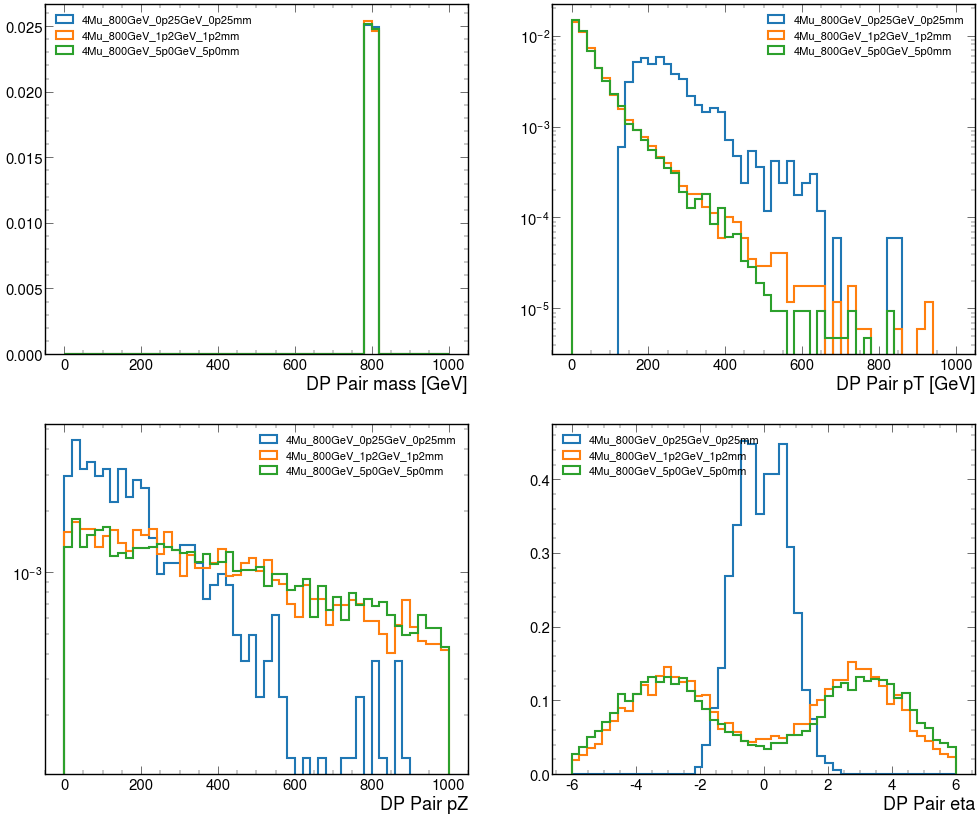

In [43]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(2, 2, figsize=(24,20))

for i_4mu in ["4Mu_800GeV_0p25GeV_0p25mm","4Mu_800GeV_1p2GeV_1p2mm","4Mu_800GeV_5p0GeV_5p0mm"]:
    
    gen_parts = events_4mu[i_4mu].GenPart
    res_sel = (gen_parts.pdgId == 35) & (ak.num(gen_parts.distinctChildrenIdxG,axis=-1)==2)
    dp_sel = (gen_parts.pdgId == 32)
    res = gen_parts[res_sel]
    dps = gen_parts[dp_sel]
    dps_pair = dps[:,:].sum()
    
    ax[0,0].hist(dps_pair.mass, range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[0,1].hist(dps_pair.pt, range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,0].hist(dps_pair.pz, range=(0,1000), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    ax[1,1].hist(dps_pair.eta, range=(-6,6), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu, density=True)
    
ax[0,1].set_yscale("log")
ax[1,0].set_yscale("log")

ax[0,0].set_xlabel('DP Pair mass [GeV]')
ax[0,1].set_xlabel('DP Pair pT [GeV]')
ax[1,0].set_xlabel('DP Pair pZ')
ax[1,1].set_xlabel('DP Pair eta')

ax[0,0].legend(fontsize=16)
ax[0,1].legend(fontsize=16)
ax[1,0].legend(fontsize=16, loc='upper right')
ax[1,1].legend(fontsize=16, loc='upper left')